## Imports

In [97]:
import os
import sys
import pandas as pd
import seaborn as sns

from typing import List, Union

# Importing functions from src/data
module_path = os.path.abspath(os.path.join('..')) + "/src/data"

if module_path not in sys.path:
    sys.path.append(module_path)

import src.data.database as db
import src.data.api as api

## Table of Contents

1. [Data Collection](#data-collection)
2. [Data Validation](#data-validation)
3. [Preprocessing](#preprocessing)

### Data Collection

The average price is collected from an API and stored in a postgresql database. In order to retrieve the data in order to begin any analysis we make a query to the database which is handled by the market_data function below.

The data recieved is in the format of a list of 3-tuples containing a unique id, time and price at that time.

In [82]:
def market_data(item_name: str, region_id: Union[str, int] = "0", order_type: str = "buy", stat: str = "weightedAverage") -> List:
    """ Makes a query to the postgresql database market_data based on the parameters specified.

    Args:
        item_name (str): Provide the name of the raw material,
        
        region_id (str, int): Select region id of the market data. defaults to "0".
        
            - There are 7 Regions
                - Global - 0
                - Jita - 30000142
                - Perimeter - 30000144
                - Jita 4-4 CNAP - 60003760
                - Amarr VIII - 60008494
                - Dodixie - 60011866
                - Rens - 60004588
                - Hek - 60005686
                
        order_type (str, optional): Either 'buy' or 'sell' orders. Defaults to "buy".
        
        stat(str): Select the summary statistic to return

            - Valid args for stat:
                - weightedAverage
                - max
                - min
                - stddev
                - median
                - volume
                - orderCount
                - percentile

    Returns:
        List: Contains a list of tuples containing id, time, and data from market_data
    """
    # Validating and reformating arguments into proper format
    order_type = order_type.lower()
    print(order_type)
    if order_type != ("buy" or "sell"):
        raise ValueError(f"Found order_type to be of type {type(order_type)}")
    
    itemid = api.get_item_id(item_name)
    
    # Postgresql query unpacking JSON data field
    command = (
        f"""
        SELECT id, time, data -> '{itemid}' -> '{order_type}' -> '{stat}'
        FROM market_data
        WHERE region_id = {region_id}
        """
        )
    
    results = db.postgresql_command(command, results=True)
    
    return results

    
        
    

In [83]:
# Historical average buy order price for Silicon
market_data("Silicon")

buy
Command executed successfully


[(9, datetime.datetime(2022, 5, 23, 17, 43, 39, 109944), '330.190015147'),
 (17, datetime.datetime(2022, 5, 23, 17, 51, 28, 265570), '330.185014122'),
 (25, datetime.datetime(2022, 5, 23, 17, 53, 37, 343203), '330.185014122'),
 (33, datetime.datetime(2022, 5, 23, 17, 56, 9, 378611), '330.185014122'),
 (41, datetime.datetime(2022, 5, 23, 18, 0, 36, 550194), '330.185014122'),
 (49, datetime.datetime(2022, 5, 23, 18, 1, 8, 157786), '330.185014122'),
 (57, datetime.datetime(2022, 5, 23, 18, 13, 22, 706140), '330.185014122'),
 (65, datetime.datetime(2022, 5, 23, 19, 0, 35, 525674), '330.185014122'),
 (73, datetime.datetime(2022, 5, 23, 20, 0, 34, 567102), '329.690039442'),
 (81, datetime.datetime(2022, 5, 23, 21, 0, 36, 373583), '329.868006811'),
 (89, datetime.datetime(2022, 5, 23, 22, 0, 35, 475152), '329.282884727'),
 (97, datetime.datetime(2022, 5, 23, 23, 0, 37, 923222), '329.576863572'),
 (105, datetime.datetime(2022, 5, 24, 0, 0, 41, 822427), '329.576863572'),
 (113, datetime.datetim

In [122]:
# Create dataframe from the data
df = pd.DataFrame(data=market_data("Silicon"), columns=["id", "time", "avg_price"])
df.avg_price = pd.to_numeric(df.avg_price)
df

buy
Command executed successfully


,id,time,avg_price
0,9,2022-05-23 17:43:39.109944,330.190015
1,17,2022-05-23 17:51:28.265570,330.185014
2,25,2022-05-23 17:53:37.343203,330.185014
3,33,2022-05-23 17:56:09.378611,330.185014
4,41,2022-05-23 18:00:36.550194,330.185014
...,...,...,...
103,833,2022-05-29 18:00:40.069770,322.638499
104,841,2022-05-29 19:00:39.134783,322.702832
105,849,2022-05-29 20:00:40.308155,323.029130
106,857,2022-05-29 21:00:40.997815,323.886020


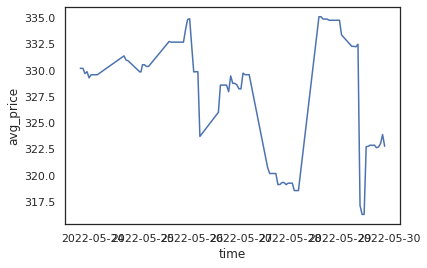

In [123]:
# Plot
sns.set_theme(style="white")
plt = sns.lineplot(x=df.time, y=df.avg_price)

